# **Airline Passenger Satisfaction**

## **Import Library**

In [4]:
from sklearn.feature_selection import chi2
from imutils import paths
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

import keras,math
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dense, Dropout
from keras.models import Model

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics


import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **Loading Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()
#from google.colab import drive
#drive.mount('/content/drive')

Saving Invistico_Airline.csv to Invistico_Airline.csv


## **Reading Dataset**

In [6]:
df = pd.read_csv("/content/Invistico_Airline.csv")
df.head()
#df = "/content/drive/MyDrive/pattern/Invistico_Airline.csv"



,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## **Null Value Handling**

In [ ]:
df =df.fillna(value =0)
df.iloc[710]

satisfaction                               satisfied
Gender                                          Male
Customer Type                         Loyal Customer
Age                                               28
Type of Travel                       Personal Travel
Class                                            Eco
Flight Distance                                 1792
Seat comfort                                       0
Departure/Arrival time convenient                  5
Food and drink                                     0
Gate location                                      3
Inflight wifi service                              5
Inflight entertainment                             0
Online support                                     5
Ease of Online booking                             5
On-board service                                   4
Leg room service                                   4
Baggage handling                                   5
Checkin service                               

## **Data Visualization**

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


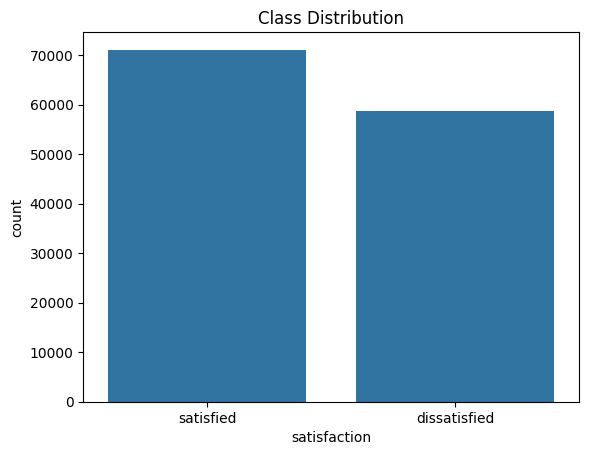

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_distribution = df['satisfaction'].value_counts()
print(class_distribution)

# Visualize class distribution
sns.countplot(x='satisfaction', data=df)
plt.title('Class Distribution')
plt.show()

In [ ]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
enc.fit(df[['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

OrdinalEncoder()

In [ ]:
 df[['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']]=enc.transform(df[['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,1.0,Male,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,1.0,Female,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,1.0,Female,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,1.0,Female,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [ ]:
X = df.iloc[:,1:23]
Y = df.iloc[:,0]

In [ ]:
X.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,2.0,2.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,3.0,0.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,3.0,2.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,3.0,3.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,3.0,4.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
Y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: satisfaction, dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Inflight entertainment'}>],
       [<Axes: title={'center': 'Online support'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <Axe

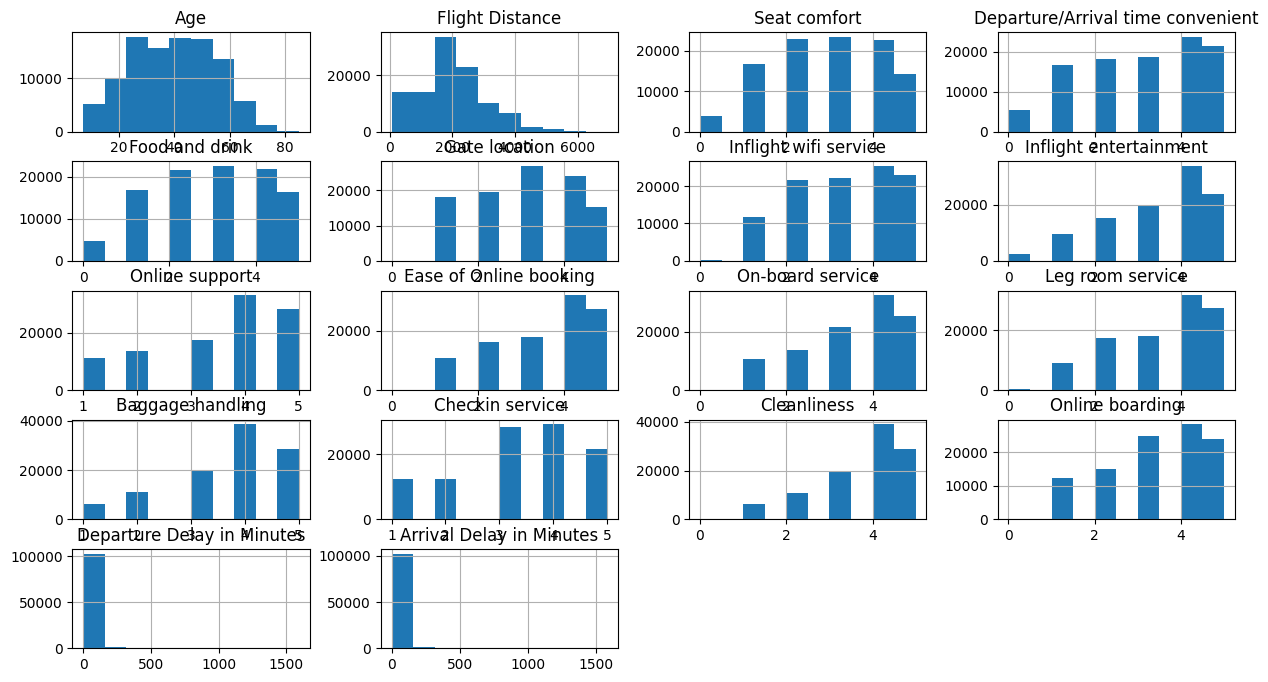

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_df = X_train.join(y_train)
train_df.hist(figsize=(15,8))


<ipython-input-9-50e11ca55744>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

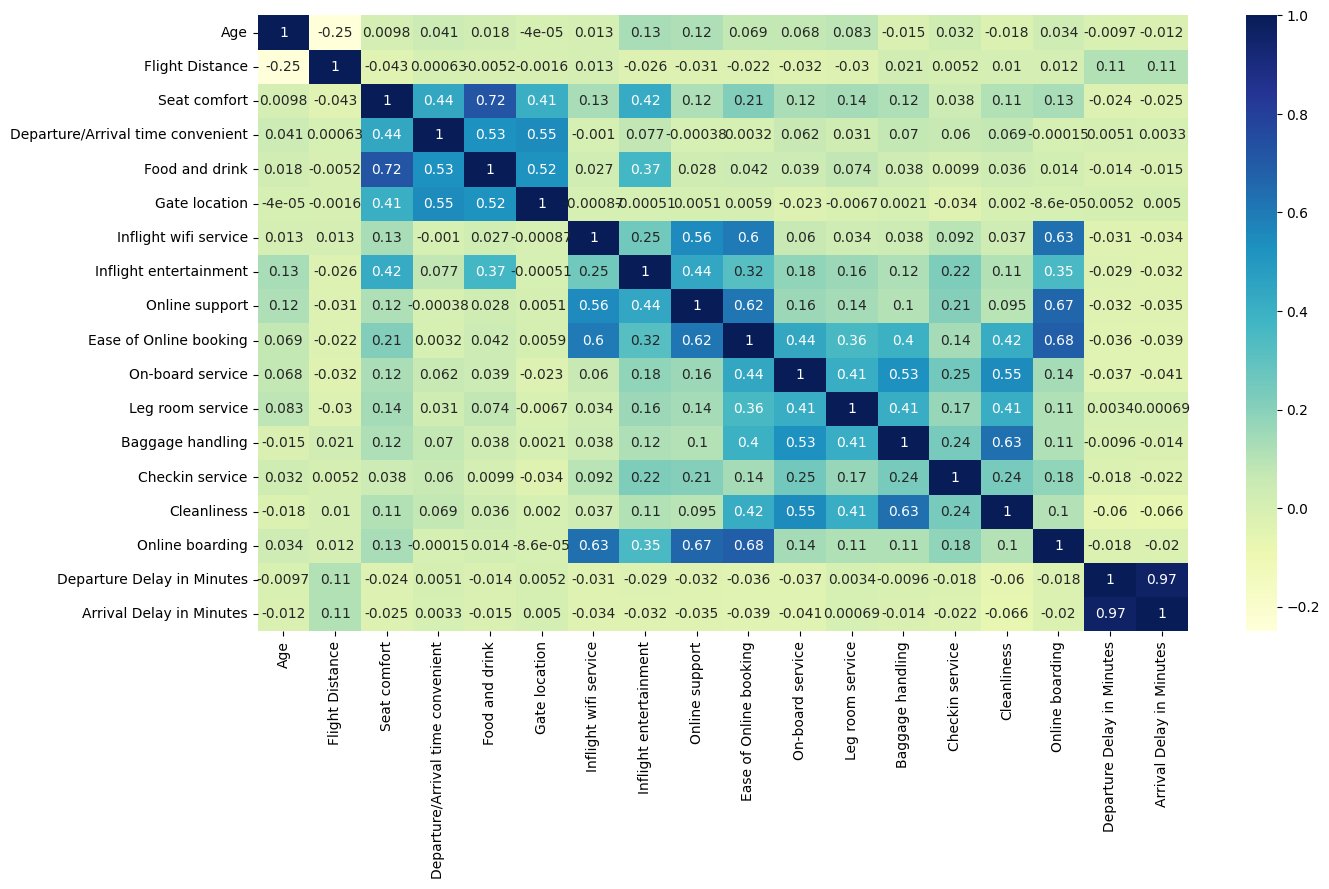

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

## **Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=123 )

In [ ]:
f_score = chi2(X_train, Y_train)

In [ ]:
f_score

(array([6.47611113e+03, 9.45086400e+03, 7.07234402e+02, 4.54175274e+03,
        7.89727838e+04, 3.64111287e+03, 1.41853497e+01, 9.79116302e+02,
        5.92453758e+00, 2.49095955e+03, 1.33514234e+04, 6.61008883e+03,
        8.23430892e+03, 5.12243236e+03, 4.01371372e+03, 3.04721734e+03,
        3.10566025e+03, 2.13557832e+03, 5.20582736e+03, 5.08274517e+04,
        6.00552227e+04]),
 array([0.00000000e+000, 0.00000000e+000, 7.99000857e-156, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 1.65655280e-004, 6.21837502e-215,
        1.49314563e-002, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000]))

In [ ]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns

In [ ]:
pvalues

Customer Type                         0.000000e+00
Age                                   0.000000e+00
Type of Travel                       7.990009e-156
Class                                 0.000000e+00
Flight Distance                       0.000000e+00
Seat comfort                          0.000000e+00
Departure/Arrival time convenient     1.656553e-04
Food and drink                       6.218375e-215
Gate location                         1.493146e-02
Inflight wifi service                 0.000000e+00
Inflight entertainment                0.000000e+00
Online support                        0.000000e+00
Ease of Online booking                0.000000e+00
On-board service                      0.000000e+00
Leg room service                      0.000000e+00
Baggage handling                      0.000000e+00
Checkin service                       0.000000e+00
Cleanliness                           0.000000e+00
Online boarding                       0.000000e+00
Departure Delay in Minutes     

In [ ]:
pvalues.sort_values(ascending = False)

Gate location                         1.493146e-02
Departure/Arrival time convenient     1.656553e-04
Type of Travel                       7.990009e-156
Food and drink                       6.218375e-215
Customer Type                         0.000000e+00
On-board service                      0.000000e+00
Departure Delay in Minutes            0.000000e+00
Online boarding                       0.000000e+00
Cleanliness                           0.000000e+00
Checkin service                       0.000000e+00
Baggage handling                      0.000000e+00
Leg room service                      0.000000e+00
Inflight entertainment                0.000000e+00
Ease of Online booking                0.000000e+00
Online support                        0.000000e+00
Age                                   0.000000e+00
Inflight wifi service                 0.000000e+00
Seat comfort                          0.000000e+00
Flight Distance                       0.000000e+00
Class                          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,1.0,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,3.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,1.0,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,1.0,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,3.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,1.0,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,3.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
df.iloc[710]

satisfaction                            1.0
Customer Type                           0.0
Age                                    21.0
Type of Travel                          1.0
Class                                   1.0
Flight Distance                      1698.0
Seat comfort                            0.0
Departure/Arrival time convenient       5.0
Food and drink                          0.0
Gate location                           3.0
Inflight wifi service                   5.0
Inflight entertainment                  0.0
Online support                          5.0
Ease of Online booking                  5.0
On-board service                        4.0
Leg room service                        4.0
Baggage handling                        4.0
Checkin service                         3.0
Cleanliness                             4.0
Online boarding                         5.0
Departure Delay in Minutes             24.0
Arrival Delay in Minutes                0.0
Name: 710, dtype: float64

In [ ]:
df.shape

(129880, 22)

In [ ]:
df.dtypes
#for messing values
#df.dropna(inplace = True)



satisfaction                         float64
Customer Type                        float64
Age                                  float64
Type of Travel                       float64
Class                                float64
Flight Distance                      float64
Seat comfort                         float64
Departure/Arrival time convenient    float64
Food and drink                       float64
Gate location                        float64
Inflight wifi service                float64
Inflight entertainment               float64
Online support                       float64
Ease of Online booking               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Cleanliness                          float64
Online boarding                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
dtype: obj

In [ ]:
x = df.iloc[:,1:23]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.3, random_state =123)

In [ ]:
mse_values =[]
for feature in x_train.columns:
  rf = RandomForestRegressor()
  rf.fit(x_train,y_train)
  y_pred = rf.predict(x_test)
  mse_values.append(mean_squared_error(y_test, y_pred))

In [ ]:
mse_values
mse_values = pd.Series(mse_values)
mse_values
mse_values.sort_values(ascending = False)


6     0.032991
15    0.032957
14    0.032876
5     0.032869
10    0.032820
12    0.032799
18    0.032791
7     0.032785
17    0.032780
11    0.032773
0     0.032752
2     0.032751
3     0.032747
13    0.032737
1     0.032720
8     0.032698
4     0.032694
9     0.032673
16    0.032660
19    0.032652
20    0.032622
dtype: float64

In [ ]:
mse_values

0     0.032752
1     0.032720
2     0.032751
3     0.032747
4     0.032694
5     0.032869
6     0.032991
7     0.032785
8     0.032698
9     0.032673
10    0.032820
11    0.032773
12    0.032799
13    0.032737
14    0.032876
15    0.032957
16    0.032660
17    0.032780
18    0.032791
19    0.032652
20    0.032622
dtype: float64

In [ ]:
mse_values = pd.Series(mse_values)

In [ ]:
mse_values.index = x_train.columns

In [ ]:
mse_values


Customer Type                        0.032752
Age                                  0.032720
Type of Travel                       0.032751
Class                                0.032747
Flight Distance                      0.032694
Seat comfort                         0.032869
Departure/Arrival time convenient    0.032991
Food and drink                       0.032785
Gate location                        0.032698
Inflight wifi service                0.032673
Inflight entertainment               0.032820
Online support                       0.032773
Ease of Online booking               0.032799
On-board service                     0.032737
Leg room service                     0.032876
Baggage handling                     0.032957
Checkin service                      0.032660
Cleanliness                          0.032780
Online boarding                      0.032791
Departure Delay in Minutes           0.032652
Arrival Delay in Minutes             0.032622
dtype: float64

In [ ]:
mse_values.sort_values(ascending=False)

Departure/Arrival time convenient    0.032991
Baggage handling                     0.032957
Leg room service                     0.032876
Seat comfort                         0.032869
Inflight entertainment               0.032820
Ease of Online booking               0.032799
Online boarding                      0.032791
Food and drink                       0.032785
Cleanliness                          0.032780
Online support                       0.032773
Customer Type                        0.032752
Type of Travel                       0.032751
Class                                0.032747
On-board service                     0.032737
Age                                  0.032720
Gate location                        0.032698
Flight Distance                      0.032694
Inflight wifi service                0.032673
Checkin service                      0.032660
Departure Delay in Minutes           0.032652
Arrival Delay in Minutes             0.032622
dtype: float64

<Axes: >

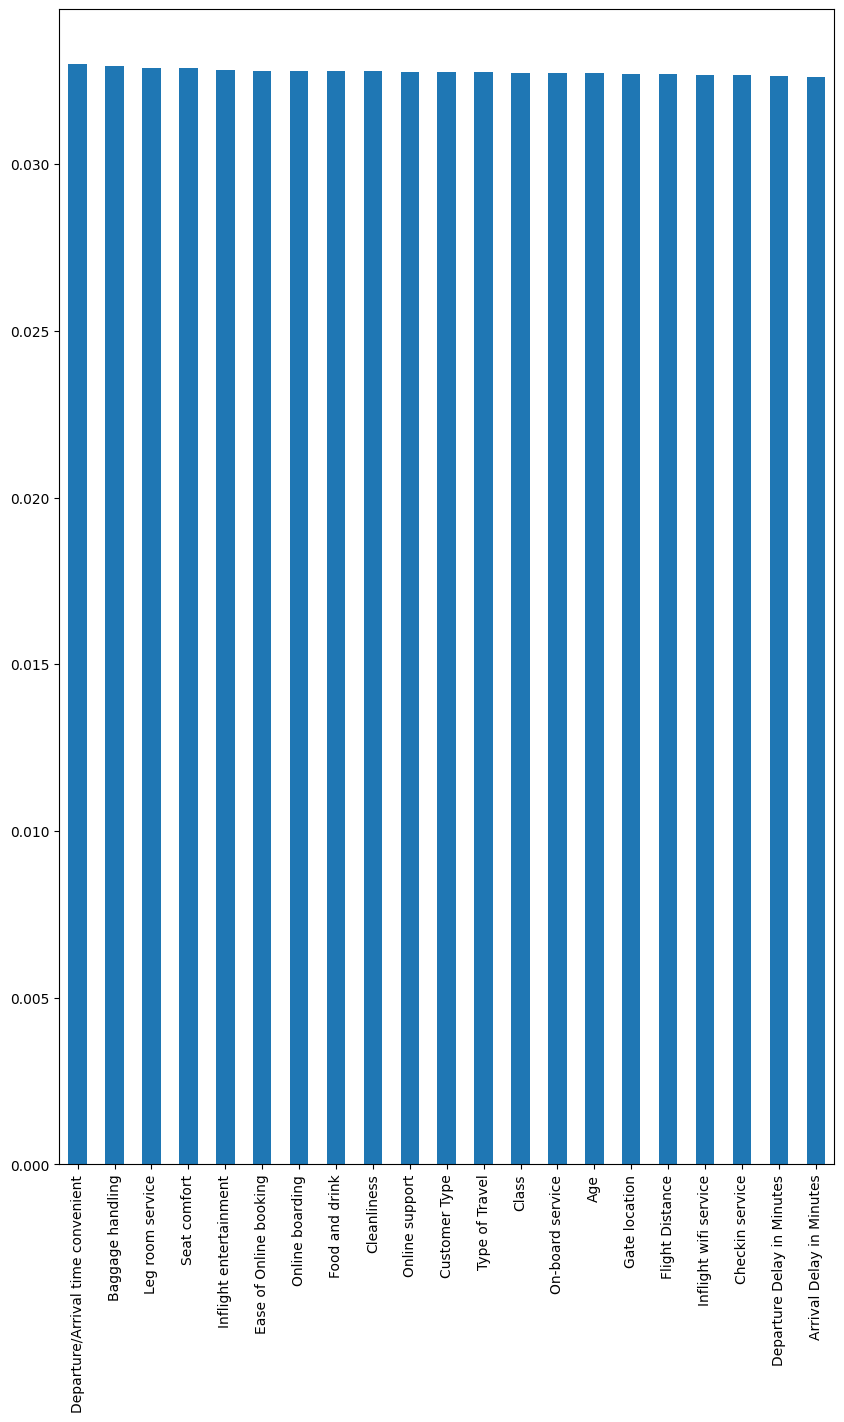

In [ ]:
mse_values.sort_values(ascending =False).plot.bar(figsize=(10,15))

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
#backword Elimination

In [ ]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,2.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,1.0,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,3.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,1.0,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,1.0,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,3.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,1.0,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,3.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
df.shape

(129880, 22)

In [ ]:
x.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,2.0,2.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,3.0,0.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,3.0,2.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,3.0,3.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,3.0,4.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
y.shape


(129880,)

In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: satisfaction, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs =-1), k_features =8, forward = False, floating = False, verbose =2,scoring ="accuracy",cv =5).fit(x_train, y_train)


[2023-12-09 15:13:41] Features: 20/8 -- score: 0.9538475134949929
[2023-12-09 15:27:32] Features: 19/8 -- score: 0.9541774757144086
[2023-12-09 15:40:23] Features: 18/8 -- score: 0.9544414573457477
[2023-12-09 15:50:43] Features: 17/8 -- score: 0.9538585037067179
[2023-12-09 15:59:54] Features: 16/8 -- score: 0.9532535448438262
[2023-12-09 16:07:34] Features: 15/8 -- score: 0.9513836942107782
[2023-12-09 16:14:44] Features: 14/8 -- score: 0.9500087872092976
[2023-12-09 16:20:53] Features: 13/8 -- score: 0.9485569136422323
[2023-12-09 16:26:25] Features: 12/8 -- score: 0.9462470916073255
[2023-12-09 16:31:30] Features: 11/8 -- score: 0.943695278042739
[2023-12-09 16:35:58] Features: 10/8 -- score: 0.9408464734988001
[2023-12-09 16:39:44] Features: 9/8 -- score: 0.9372717451764228
[2023-12-09 16:42:24] Features: 8/8 -- score: 0.9329710906560541

In [ ]:
backward_feature_selector.k_feature_names_

('Customer Type',
 'Type of Travel',
 'Seat comfort',
 'Gate location',
 'Inflight entertainment',
 'Ease of Online booking',
 'Baggage handling',
 'Cleanliness')

In [ ]:
backward_feature_selector.k_score_

0.9329710906560541

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =100)


In [ ]:
x_train.shape, x_test.shape

((90916, 21), (38964, 21))

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [ ]:
sel = SelectFromModel(LogisticRegression(penalty="l1", C=0.1, solver="liblinear"))

In [ ]:
sel.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [ ]:
sel.get_feature_names_out()

array(['Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

In [ ]:
len(sel.get_feature_names_out())

21

In [ ]:
x_train.shape

(90916, 21)

In [ ]:
x_train.columns
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
x_train1 = sel.transform(x_train)
x_test1 = sel.transform(x_test)

In [ ]:
x_train1.shape, x_train.shape

((90916, 21), (90916, 21))

In [ ]:
glm = LogisticRegression()
glm.fit(x_train1, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = glm.predict(x_test1)

In [ ]:
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)#l1 accuracy

0.7351657940663177

In [ ]:
sel = SelectFromModel(LogisticRegression(penalty="l2", C=10, solver="liblinear"))


In [ ]:
sel.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=10, solver='liblinear'))

In [ ]:
sel.get_feature_names_out()

array(['Customer Type', 'Type of Travel', 'Class',
       'Inflight entertainment', 'On-board service'], dtype=object)

In [ ]:
len(sel.get_feature_names_out())

5

In [ ]:
x_train.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
sel.get_support()

array([ True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False])

In [ ]:
x_train1 = sel.transform(x_train)
x_test1 = sel.transform(x_test)

In [ ]:
x_train1.shape, x_train.shape

((90916, 5), (90916, 21))

In [ ]:
glm = LogisticRegression()
glm.fit(x_train1, y_train)

LogisticRegression()

In [ ]:
y_pred = glm.predict(x_test1)

In [ ]:
y_pred

array([1., 1., 1., ..., 0., 1., 0.])

In [ ]:
accuracy_score(y_test,y_pred)#l2 accuracy

0.8008674674058105

In [ ]:
#forward

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs =-1), k_features =6, forward = True, floating = False, verbose =2,scoring ="accuracy",cv =5).fit(x_train, y_train)


[2023-12-11 15:54:29] Features: 1/6 -- score: 0.8103964227257038
[2023-12-11 15:58:18] Features: 2/6 -- score: 0.8482115285911608
[2023-12-11 16:02:14] Features: 3/6 -- score: 0.893891047653834
[2023-12-11 16:07:00] Features: 4/6 -- score: 0.9056381685498407
[2023-12-11 16:11:53] Features: 5/6 -- score: 0.9158673790361128
[2023-12-11 16:16:52] Features: 6/6 -- score: 0.924699699677902

In [ ]:
forward_feature_selection.k_score_

0.924699699677902

In [ ]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8092278926528816, 0.808062475939064, 0.8127...",0.810396,"(Inflight entertainment,)",0.002399,0.001866,0.000933
2,"(5, 10)","[0.8488781346238451, 0.8451300665456746, 0.850...",0.848212,"(Seat comfort, Inflight entertainment)",0.002243,0.001745,0.000872
3,"(5, 8, 10)","[0.8954025516937968, 0.8905021173623714, 0.896...",0.893891,"(Seat comfort, Gate location, Inflight enterta...",0.002693,0.002095,0.001048
4,"(5, 8, 10, 12)","[0.9059062912450506, 0.9033712808667437, 0.908...",0.905638,"(Seat comfort, Gate location, Inflight enterta...",0.003181,0.002475,0.001237
5,"(3, 5, 8, 10, 12)","[0.917234931808183, 0.9157454765440246, 0.9184...",0.915867,"(Class, Seat comfort, Gate location, Inflight ...",0.003042,0.002367,0.001183
6,"(0, 3, 5, 8, 10, 12)","[0.9268037835459745, 0.9232249903756256, 0.926...",0.9247,"(Customer Type, Class, Seat comfort, Gate loca...",0.002774,0.002158,0.001079


In [ ]:
forward_feature_selection.k_feature_names_

('Customer Type',
 'Class',
 'Seat comfort',
 'Gate location',
 'Inflight entertainment',
 'Ease of Online booking')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)


In [ ]:
df = df.fillna(df.mean())

<ipython-input-10-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
scaler = StandardScaler()
df['Flight Distance'] = scaler.fit_transform(df[['Flight Distance']])

In [ ]:
label_encoder = LabelEncoder()
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])
df['Class'] = label_encoder.fit_transform(df['Class'])

In [ ]:
df = pd.get_dummies(df, columns=['satisfaction', 'Online boarding', 'Class', 'Type of Travel'])


In [ ]:
df.head()


,Customer Type,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Class_0,Class_1,Class_2,Type of Travel_0,Type of Travel_1
0,0,65,-1.671103,0,0,0,2,2,4,2,...,0,1,0,0,0,0,1,0,0,1
1,0,47,0.469852,0,0,0,3,0,2,2,...,0,1,0,0,0,1,0,0,0,1
2,0,15,0.152458,0,0,0,3,2,0,2,...,0,1,0,0,0,0,1,0,0,1
3,0,60,-1.322552,0,0,0,3,3,4,3,...,0,0,1,0,0,0,1,0,0,1
4,0,70,-1.584452,0,0,0,3,4,3,4,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
print(df.head())

   Customer Type  Age  Flight Distance  Seat comfort  \
0              0   65        -1.671103             0   
1              0   47         0.469852             0   
2              0   15         0.152458             0   
3              0   60        -1.322552             0   
4              0   70        -1.584452             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   

   Inflight wifi service  Inflight entertainment  Online support  ...  \
0                      2                       4               2  ...   
1                      0                       2               2  ...   
2                

## **Feature Extraction**

In [ ]:

df['Flight Distance'] = df['Flight Distance'].astype(str)
df['On-board service'] = df['On-board service'].astype(str)

In [ ]:
def concatenate_zero(val):
  if len(val) <6:
    return val + '0'
  else:
    return val

In [ ]:
df['On-board service'] = df['On-board service'].apply(concatenate_zero)

In [ ]:
print(df['Flight Distance'].dtype)
print(df['On-board service'].dtype)

object
object


In [ ]:
df["Converted Time"]= df["Flight Distance"].str.cat(df['On-board service'])

In [ ]:
import datetime

def convert_unix_epoch(epoch_time):
  epoch_time = int(epoch_time)
  dt = datetime.datetime.fromtimestamp(epoch_time/1000000)
  return dt.strftime("%Y-%m-%d %H:%M:%S.%f %p")+'';

In [ ]:
convert_unix_epoch(1322489729170626)

'2011-11-28 14:15:29.170626 PM'

In [ ]:
df['Converted Time'] = df['Converted Time'].apply(convert_unix_epoch)

In [ ]:
df['Converted Time'].iloc[90:100]

90    1970-01-01 00:00:00.000240 AM
91    1970-01-01 00:00:00.000130 AM
92    1970-01-01 00:00:00.000030 AM
93    1970-01-01 00:00:00.000030 AM
94    1970-01-01 00:00:00.000020 AM
95    1970-01-01 00:00:00.000010 AM
96    1970-01-01 00:00:00.000030 AM
97    1970-01-01 00:00:00.000020 AM
98    1970-01-01 00:00:00.000020 AM
99    1970-01-01 00:00:00.000020 AM
Name: Converted Time, dtype: object

In [ ]:
def extract_miliseconds(val):
    val = str(val)
    return val[17:26]

In [ ]:
df['Converted Seconds'] = df['Converted Time'].apply(extract_miliseconds)

In [ ]:
df['Converted Seconds'].iloc[10:20]

10    59.999870
11    00.000130
12    00.000010
13    00.000030
14    59.999850
15    00.000030
16    00.000140
17    00.000010
18    00.000010
19    00.000120
Name: Converted Seconds, dtype: object

In [ ]:
print(df.head())

   Customer Type  Age Flight Distance  Seat comfort  \
0              0   65              -1             0   
1              0   47               0             0   
2              0   15               0             0   
3              0   60              -1             0   
4              0   70              -1             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   

   Inflight wifi service  Inflight entertainment  Online support  ...  \
0                      2                       4               2  ...   
1                      0                       2               2  ...   
2                      

In [ ]:
import numpy as np
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,0.0,58.0,1.0,1.0,171.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,2.0,5.0,3.0,2.0,0.0,0.0
1,1.0,Male,0.0,40.0,1.0,0.0,2370.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,1.0,Female,0.0,8.0,1.0,1.0,2044.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,1.0,Female,0.0,53.0,1.0,1.0,529.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,4.0,1.0,3.0,0.0,0.0
4,1.0,Female,0.0,63.0,1.0,1.0,260.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,1.0,4.0,2.0,5.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  float64
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  float64
 3   Age                                129880 non-null  float64
 4   Type of Travel                     129880 non-null  float64
 5   Class                              129880 non-null  float64
 6   Flight Distance                    129880 non-null  float64
 7   Seat comfort                       129880 non-null  float64
 8   Departure/Arrival time convenient  129880 non-null  float64
 9   Food and drink                     129880 non-null  float64
 10  Gate location                      129880 non-null  float64
 11  Inflight wifi service              1298

In [ ]:
df.duplicated().sum()


0

In [ ]:
# seeing if there are null values.
df=df.dropna()
df.isna().sum()


satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [ ]:
cluster_mapping = {
    'Seat comfort': {0: 1},
    'Departure/Arrival time convenient': {0: 1},
    'Food and drink': {0: 1},
    'Gate location': {0: 1},
    'Inflight wifi service': {0: 1},
    'Inflight entertainment': {0: 1},
    'Online support': {0: 1},
    'Ease of Online booking': {0: 1},
    'On-board service': {0: 1},
    'Leg room service': {0: 1},
    'Baggage handling': {0: 1},
    'Checkin service': {0: 1},
    'Cleanliness': {0: 1},
    'Online boarding': {0: 1}
}

# Update the specified columns with the new cluster labels using applymap
for col, mapping in cluster_mapping.items():
    df[col] = df[col].apply(lambda x: mapping.get(x, x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  float64
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  float64
 3   Age                                129880 non-null  float64
 4   Type of Travel                     129880 non-null  float64
 5   Class                              129880 non-null  float64
 6   Flight Distance                    129880 non-null  float64
 7   Seat comfort                       129880 non-null  float64
 8   Departure/Arrival time convenient  129880 non-null  float64
 9   Food and drink                     129880 non-null  float64
 10  Gate location                      129880 non-null  float64
 11  Inflight wifi service              1298

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Female,0.0,58.0,1.0,1.0,171.0,1.0,1.0,1.0,...,2.0,3.0,3.0,1.0,2.0,5.0,3.0,2.0,0.0,0.0
1,1.0,Male,0.0,40.0,1.0,0.0,2370.0,1.0,1.0,1.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,1.0,Female,0.0,8.0,1.0,1.0,2044.0,1.0,1.0,1.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,1.0,Female,0.0,53.0,1.0,1.0,529.0,1.0,1.0,1.0,...,3.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0
4,1.0,Female,0.0,63.0,1.0,1.0,260.0,1.0,1.0,1.0,...,4.0,2.0,2.0,1.0,1.0,4.0,2.0,5.0,0.0,0.0


## **Data Pre-processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and the target column is named 'satisfaction'
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])

In [ ]:
# Split data into x and y.
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [ ]:

X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,0.0,58.0,1.0,1.0,171.0,1.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,2.0,5.0,3.0,2.0,0.0,0.0
1,Male,0.0,40.0,1.0,0.0,2370.0,1.0,1.0,1.0,3.0,...,2.0,3.0,4.0,4.0,3.0,2.0,3.0,2.0,309.0,305.0
2,Female,0.0,8.0,1.0,1.0,2044.0,1.0,1.0,1.0,3.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
3,Female,0.0,53.0,1.0,1.0,529.0,1.0,1.0,1.0,3.0,...,3.0,1.0,1.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0
4,Female,0.0,63.0,1.0,1.0,260.0,1.0,1.0,1.0,3.0,...,4.0,2.0,2.0,1.0,1.0,4.0,2.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,1.0,22.0,1.0,1.0,1637.0,5.0,5.0,5.0,3.0,...,2.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0
129876,Male,1.0,56.0,1.0,0.0,1993.0,2.0,3.0,2.0,4.0,...,1.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,174.0,172.0
129877,Male,1.0,62.0,1.0,1.0,2226.0,3.0,1.0,3.0,3.0,...,2.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,155.0,163.0
129878,Male,1.0,59.0,1.0,1.0,2356.0,3.0,2.0,3.0,2.0,...,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,193.0,205.0


In [ ]:
# One hot Endocing .
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding.
label_encoder = LabelEncoder()
for i in ['Gender', 'Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [ ]:
# Select the features you want to scale
selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

# Create a scaler object.
scaler = StandardScaler()

# Fit scaler on the selected features.
scaler.fit(selected_features)

# Transform the selected features with the scaler.
selected_features_scaled = scaler.transform(selected_features)

# Replace the original columns with the scaled values in the DataFrame
X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled

X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_0.0,Class_1.0,Class_2.0
0,0,0,1.691650,1,-1.682553,1.0,1.0,1.0,2.0,2.0,...,1.0,2.0,5.0,3.0,2.0,-0.403829,0.0,0,1,0
1,1,0,0.500944,1,0.474767,1.0,1.0,1.0,3.0,1.0,...,4.0,3.0,2.0,3.0,2.0,8.145855,305.0,1,0,0
2,0,0,-1.615866,1,0.154946,1.0,1.0,1.0,3.0,2.0,...,3.0,3.0,4.0,4.0,2.0,-0.403829,0.0,0,1,0
3,0,0,1.360898,1,-1.331338,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,4.0,1.0,3.0,-0.403829,0.0,0,1,0
4,0,0,2.022402,1,-1.595240,1.0,1.0,1.0,3.0,4.0,...,1.0,1.0,4.0,2.0,5.0,-0.403829,0.0,0,1,0


In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

## **Model**

### **LogisticRegression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set: 0.7904342677684248

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.76     17639
           1       0.78      0.85      0.82     21208

    accuracy                           0.79     38847
   macro avg       0.79      0.78      0.79     38847
weighted avg       0.79      0.79      0.79     38847



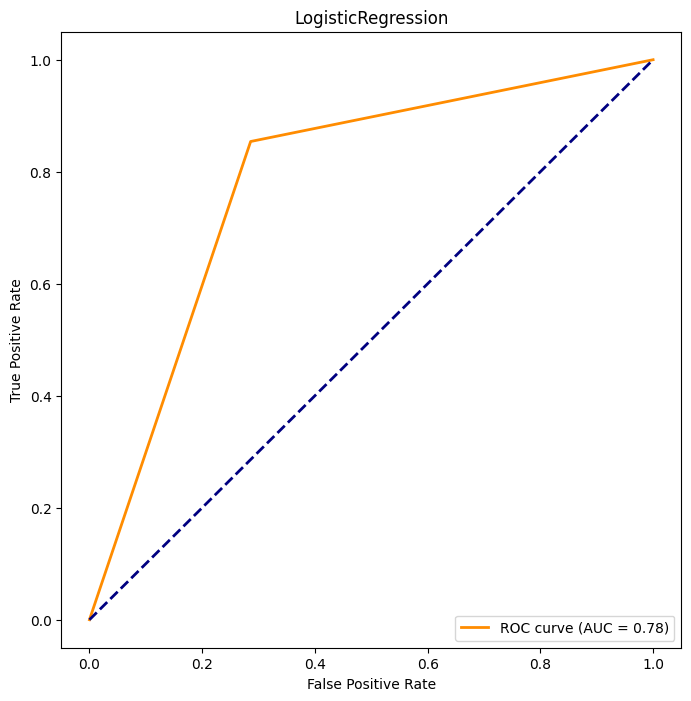

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Drop columns with NaN values
df.dropna(axis=1, inplace=True)

# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])

# Splitting data into Feature and
X = df.drop('satisfaction', axis=1)  # Adjust 'target_column_name' to your actual target column
y = df['satisfaction']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.legend(loc='lower right')
plt.show()

### **Neural Network**

In [30]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy on the test set: {accuracy}")

Epoch 1/10
2590/2590 [==============================] - 15s 5ms/step - loss: 1.4215 - accuracy: 0.6918 - val_loss: 0.4254 - val_accuracy: 0.8207
Epoch 2/10
2590/2590 [==============================] - 13s 5ms/step - loss: 0.6462 - accuracy: 0.7584 - val_loss: 0.4897 - val_accuracy: 0.8097
Epoch 3/10
2590/2590 [==============================] - 13s 5ms/step - loss: 0.6446 - accuracy: 0.7669 - val_loss: 0.5110 - val_accuracy: 0.7840
Epoch 4/10
2590/2590 [==============================] - 13s 5ms/step - loss: 0.5905 - accuracy: 0.7771 - val_loss: 0.4767 - val_accuracy: 0.8128
Epoch 5/10
2590/2590 [==============================] - 13s 5ms/step - loss: 0.5537 - accuracy: 0.7818 - val_loss: 0.4886 - val_accuracy: 0.8073
Epoch 6/10
2590/2590 [==============================] - 12s 5ms/step - loss: 0.4955 - accuracy: 0.7954 - val_loss: 0.4084 - val_accuracy: 0.8244
Epoch 7/10
2590/2590 [==============================] - 12s 5ms/step - loss: 0.4736 - accuracy: 0.8000 - val_loss: 0.4221 - val_ac

### **MLPClassifier**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Initialize the MLP Classifier with the preprocessor in a pipeline
mlp = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))])

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9386356636895596

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11675
           1       0.95      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976


Confusion Matrix:
[[10964   711]
 [  883 13418]]


In [ ]:

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())


print("Unique values in 'satisfaction':", y.unique())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values in X: Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64
Missing values in y: 0
Unique values in 'satisfaction': [1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


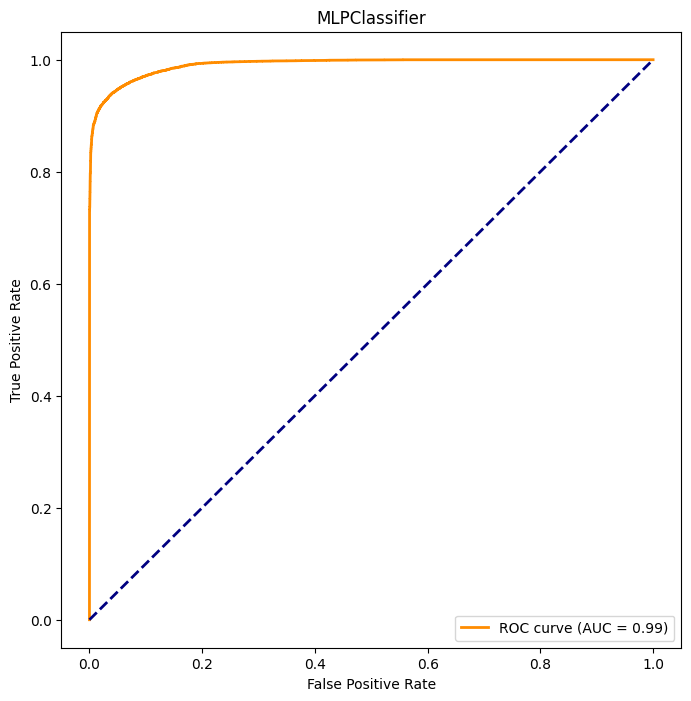

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt




X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=(10, 8, 6), random_state=5, learning_rate_init=0.001))])

# Fit the model
clf.fit(X_train, y_train)


y_probs = clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLPClassifier')
plt.legend(loc='lower right')
plt.show()

### **RandomForestClassifier**

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.metrics import roc_curve, auc


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     17639
           1       0.97      0.96      0.96     21208

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



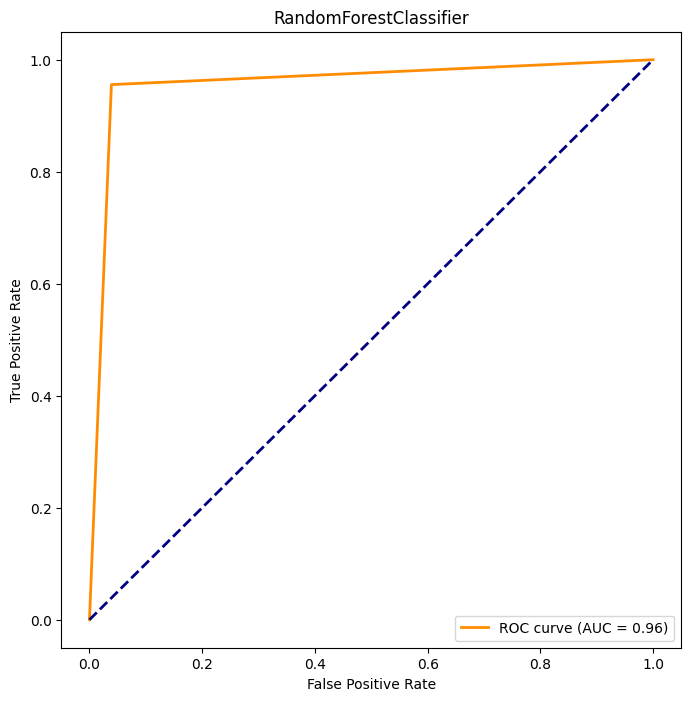

In [19]:
# Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Drop columns with NaN values
df.dropna(axis=1, inplace=True)

# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
df['Class'] = le.fit_transform(df['Class'])

# Splitting data into Feature and
X = df.drop('satisfaction', axis=1)  # Adjust 'target_column_name' to your actual target column
y = df['satisfaction']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

### **AdaBoostClassifier**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     17639
           1       0.96      0.95      0.95     21208

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



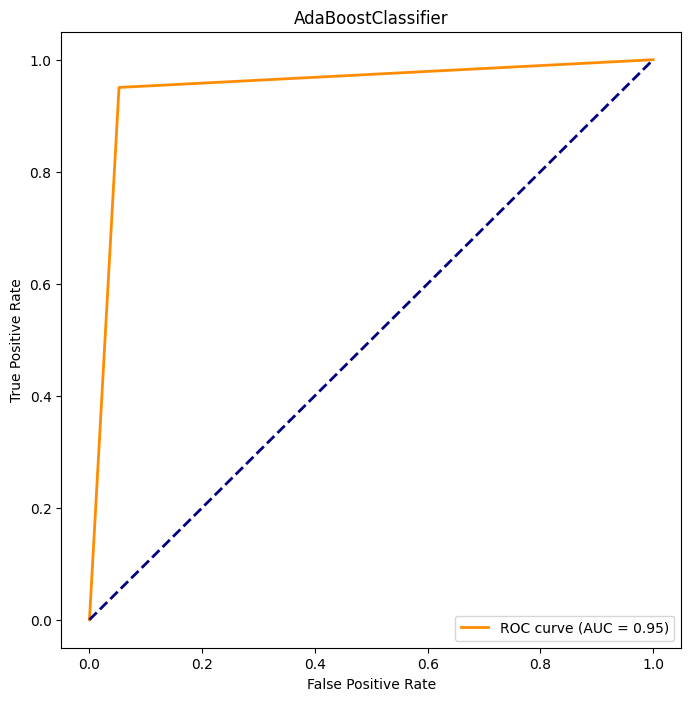

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


from google.colab import drive
drive.mount('/content/drive')


data = pd.read_csv(r'/content/drive/My Drive/Invistico_Airline.csv')
data.head()

# Drop rows with NaN values
data.dropna(axis=0, inplace=True)

# Drop columns with NaN values
data.dropna(axis=1, inplace=True)

# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['satisfaction']=le.fit_transform(data['satisfaction'])
data['Gender']=le.fit_transform(data['Gender'])
data['Customer Type']=le.fit_transform(data['Customer Type'])
data['Type of Travel']=le.fit_transform(data['Type of Travel'])
data['Class']=le.fit_transform(data['Class'])


# Spliting data into Feature and
X = data.drop('satisfaction', axis=1)  # Adjust 'target_column_name' to your actual target column
y = data['satisfaction']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

base_classifier = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth or try a different base classifier
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)


# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoostClassifier')
plt.legend(loc='lower right')
plt.show()